# Data Wrangling

## Imports

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [116]:
df_original = pd.read_csv("raw_data/walmart.csv")
df = df_original.copy()
df.columns = [i.lower() for i in df.columns]

## Explore the data

In [117]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [118]:
df.tail()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [120]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [121]:
df.dtypes

store             int64
date             object
weekly_sales    float64
holiday_flag      int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
dtype: object

### Missing values

In [122]:
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [123]:
df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

**NOTE:**
- There are no missing values. Data is clean.

### Store-by-store analysis

In [124]:
df_gb_store = df.groupby("store")
df_gb_store["store"].agg("count")

store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: store, dtype: int64

**NOTE:**
- There are 143 samples/records for each store. The data is uniform across stores.

In [125]:
df_gb_store["weekly_sales"].agg(["sum","mean"]).head()

,sum,mean
store,,
1,2.224028e+08,1.555264e+06
2,2.753824e+08,1.925751e+06
3,5.758674e+07,4.027044e+05
4,2.995440e+08,2.094713e+06
5,4.547569e+07,3.180118e+05


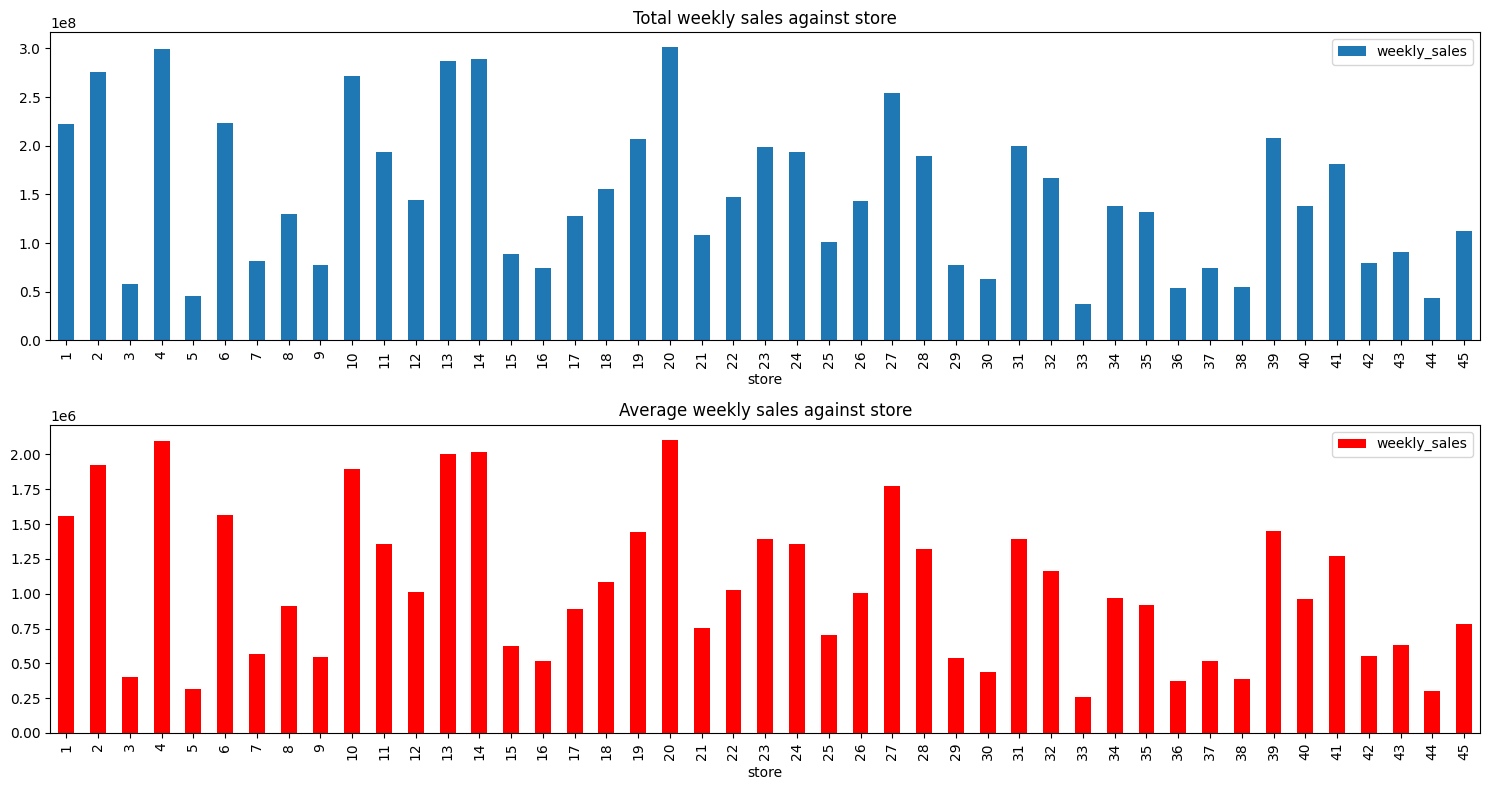

In [126]:
fig, axes = plt.subplots(2,1,figsize=(15,8))

df_gb_store[["weekly_sales"]].agg("sum").plot(ax=axes[0],kind="bar",label="sum")
axes[0].set_title("Total weekly sales against store")
axes[0].legend(loc="upper right")

df_gb_store[["weekly_sales"]].agg("mean").plot(ax=axes[1],kind="bar",label="mean",color="red")
axes[1].set_title("Average weekly sales against store")
axes[1].legend(loc="upper right")

fig.tight_layout()
plt.show()

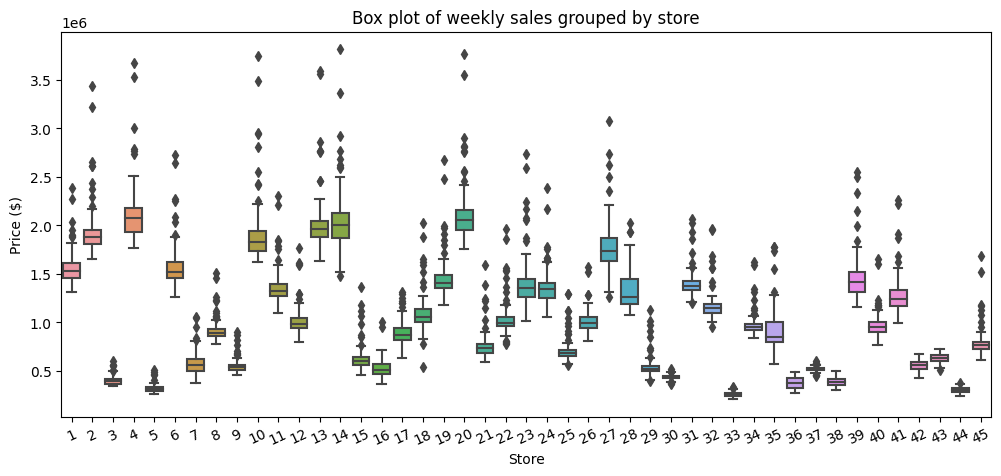

In [127]:
# Boxplot method 1
plt.subplots(figsize=(12,5))
sns.boxplot(x="store",y="weekly_sales",data=df)
plt.xticks(rotation=25)
plt.title("Box plot of weekly sales grouped by store")
plt.ylabel("Price ($)")
plt.xlabel("Store")
plt.show()

# Boxplot method 2
# ax = df.boxplot(column="weekly_sales",by="store",figsize=(12,8))
# plt.xticks(rotation=25)
# ax.set_title("fhgtythg")
# plt.show()

## Steps to consider further

These are some further steps to consider:
* Make and save a separate dataframe of the summary statistics for each store
* Make multi-plot histograms of each numeric feature
* Make countplots of each categorical feature
* Get the actual location for each store

## Saving data

In [128]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [129]:
# # Method 2 for saving
# from library.sb_utils import save_file
# datapath = "datasets"
# save_file(df,"after_data_wrangling.csv",datapath)

# # Method 2 for saving
# # df.to_csv("datasets/after_data_wrangling.csv")

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_data_wrangling.csv"
